<a href="https://colab.research.google.com/github/shivangi-975/Data-Preparation-for-ML/blob/main/Discretization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing libraries

In [ ]:
import pandas as pd
import numpy as np

#### Setting up a 1-D array

In [ ]:
X = np.array([-7, 2, -3, -11, 14, 6, 8])

#### Discretization in pandas

https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.cut.html

In [ ]:
categories = pd.cut(X, 4)

categories

[(-11.025, -4.75], (1.5, 7.75], (-4.75, 1.5], (-11.025, -4.75], (7.75, 14.0], (1.5, 7.75], (7.75, 14.0]]
Categories (4, interval[float64]): [(-11.025, -4.75] < (-4.75, 1.5] < (1.5, 7.75] < (7.75, 14.0]]

In [ ]:
categories.categories

IntervalIndex([(-11.025, -4.75], (-4.75, 1.5], (1.5, 7.75], (7.75, 14.0]],
              closed='right',
              dtype='interval[float64]')

In [ ]:
categories.codes

array([0, 2, 1, 0, 3, 2, 3], dtype=int8)

In [ ]:
categories.ordered

True

#### This time we are setting retbins parameter to True so it will also return the bins

In [ ]:
pd.cut(X, 4, retbins=True)

([(-11.025, -4.75], (1.5, 7.75], (-4.75, 1.5], (-11.025, -4.75], (7.75, 14.0], (1.5, 7.75], (7.75, 14.0]]
 Categories (4, interval[float64]): [(-11.025, -4.75] < (-4.75, 1.5] < (1.5, 7.75] < (7.75, 14.0]],
 array([-11.025,  -4.75 ,   1.5  ,   7.75 ,  14.   ]))

#### Specifing the labels for the returned bins

In [ ]:
marks = np.array([70, 20, 30, 99, 40, 16, 80])

In [ ]:
categories, bins = pd.cut(marks, 4, retbins=True, labels=['poor', 'average', 'good', 'excellent'])

In [ ]:
categories

[good, poor, poor, excellent, average, poor, excellent]
Categories (4, object): [poor < average < good < excellent]

In [ ]:
categories.categories

Index(['poor', 'average', 'good', 'excellent'], dtype='object')

In [ ]:
bins

array([15.917, 36.75 , 57.5  , 78.25 , 99.   ])

#### Passing a Series as an input returns a Series with mapping value

In [ ]:
df = pd.Series(marks, index = [1, 2, 3, 4, 5, 6, 7])

df

1    70
2    20
3    30
4    99
5    40
6    16
7    80
dtype: int64

In [ ]:
categories, bins = pd.cut(df, 4, retbins=True)

In [ ]:
categories

1      (57.5, 78.25]
2    (15.917, 36.75]
3    (15.917, 36.75]
4      (78.25, 99.0]
5      (36.75, 57.5]
6    (15.917, 36.75]
7      (78.25, 99.0]
dtype: category
Categories (4, interval[float64]): [(15.917, 36.75] < (36.75, 57.5] < (57.5, 78.25] < (78.25, 99.0]]

In [ ]:
bins

array([15.917, 36.75 , 57.5  , 78.25 , 99.   ])

### KBinsDiscretizer
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

#### Setting up a 2-D array

In [ ]:
marks = [[70], [20], [30], [99], [40], [16], [80]]

#### Here strategy = 'uniform' so all bins in each feature have identical widths.

In [ ]:
enc = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')

In [ ]:
enc.fit(marks)

KBinsDiscretizer(encode='ordinal', n_bins=4, strategy='uniform')

In [ ]:
enc.transform(marks)

array([[2.],
       [0.],
       [0.],
       [3.],
       [1.],
       [0.],
       [3.]])

#### Edges of each bin

In [ ]:
enc.bin_edges_

array([array([16.  , 36.75, 57.5 , 78.25, 99.  ])], dtype=object)

#### Setting up another 2-D array with -ve values

In [ ]:
X = [[-21, 41, -14],
     [-13, 23, -31],
     [  9, 30, -5],
     [  0, 24, -17]]

#### Here strategy = 'quantile' so all bins in each feature have the same number of points.

In [ ]:
enc = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')

In [ ]:
enc.fit(X)

KBinsDiscretizer(encode='ordinal', n_bins=4, strategy='quantile')

In [ ]:
X_trans = enc.transform(X)

X_trans

array([[0., 3., 2.],
       [1., 0., 0.],
       [3., 2., 3.],
       [2., 1., 1.]])

In [ ]:
enc.bin_edges_

array([array([-21.  , -15.  ,  -6.5 ,   2.25,   9.  ]),
       array([23.  , 23.75, 27.  , 32.75, 41.  ]),
       array([-31.  , -20.5 , -15.5 , -11.75,  -5.  ])], dtype=object)

##### The inverse_transform function converts the binned data into the original feature space. Each value will be equal to the mean of the two bin edges.

In [ ]:
enc.inverse_transform(X_trans)

array([[-18.   ,  36.875, -13.625],
       [-10.75 ,  23.375, -25.75 ],
       [  5.625,  29.875,  -8.375],
       [ -2.125,  25.375, -18.   ]])

#### Now we will build a regression model with original data and with discretized data 

#### Loading the automobiles dataset

In [ ]:
automobile_df = pd.read_csv('datasets/auto_mpg_processed.csv')

automobile_df.head(10)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Origin,age
0,18.000000,8,307.0,130,3504,307.0,US,49
1,16.000000,8,304.0,150,3433,304.0,US,49
2,17.000000,8,302.0,140,3449,302.0,US,49
3,14.000000,8,454.0,220,4354,454.0,US,49
4,23.551429,8,440.0,215,4312,440.0,US,49
5,14.000000,8,455.0,225,4425,455.0,US,49
6,15.000000,8,390.0,190,3850,390.0,US,49
7,15.000000,8,383.0,170,3563,383.0,US,49
8,14.000000,5,340.0,160,3609,340.0,US,49
9,23.551429,8,400.0,150,3761,400.0,US,49


#### Here we are taking horsepower column as feature and the predicting the mpg value

In [ ]:
X = automobile_df[['Horsepower']]
Y = automobile_df['MPG']

In [ ]:
X.sample(10)

,Horsepower
385,79
173,86
268,133
97,167
105,107
87,150
305,88
291,90
295,69
191,78


In [ ]:
import matplotlib.pyplot as plt

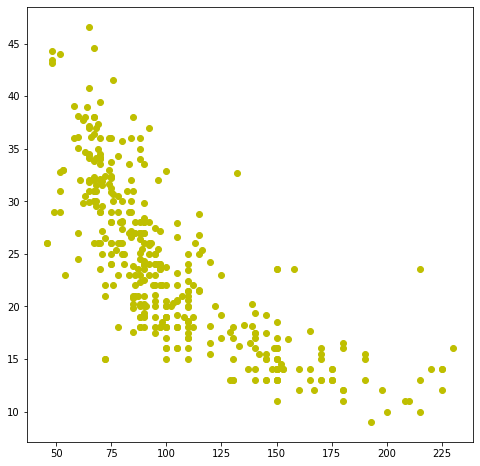

In [ ]:
plt.figure(figsize=(8, 8))

plt.plot(X, Y, 'o', c='y')

plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

### Linear Regression
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [ ]:
reg = LinearRegression().fit(x_train, y_train)

In [ ]:
y_pred = reg.predict(x_test)

y_pred

array([11.62732838, 30.0467956 , 11.62732838, 26.61265764, 25.67607456,
        3.82246938, 17.09072967, 24.5833943 , 23.33461687, 25.98826892,
       24.11510276, 16.31024377, 22.55413097, 12.40781427, 25.98826892,
       25.67607456, 16.31024377, 24.11510276, 25.3638802 , 15.52975787,
       16.31024377, 27.23704636, 28.64192098, 23.64681123, 26.76875482,
       17.87121557, 25.67607456, 28.4858238 , 25.67607456, 26.1443661 ,
       29.73460124, 28.79801816, 28.79801816, 24.89558866, 21.77364507,
       28.17362944, 25.98826892, 24.89558866, 25.67607456, 27.86143508,
       24.5833943 , 24.89558866, 20.99315917, 21.77364507, 25.98826892,
       32.07605894, 28.4858238 , 28.4858238 , 31.6077674 , 16.31024377,
       24.5833943 , 10.06635658, 30.20289278, 20.99315917, 28.79801816,
       17.09072967, 28.95411534, 32.23215612, 32.54435048, 22.55413097,
       25.98826892, 22.55413097, 29.11021252, 24.11510276, 16.31024377,
       28.01753226, 26.1443661 , 12.40781427, 29.2663097 , 25.67

In [ ]:
from sklearn.metrics import r2_score

print("r_2 score: ", r2_score(y_test, y_pred))

r_2 score:  0.5295982825213468


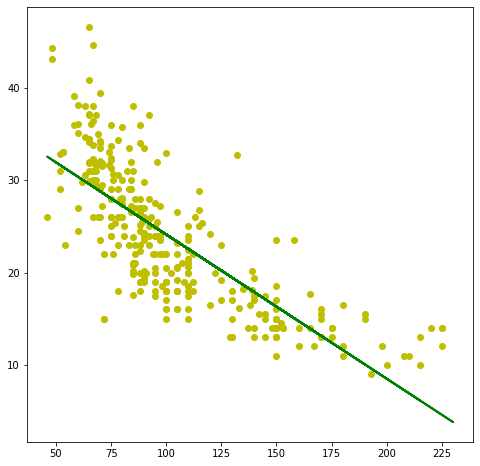

In [ ]:
plt.figure(figsize=(8, 8))

plt.plot(x_train, y_train, 'o', c='y')

plt.plot(x_test, y_pred, linewidth=2, color='green',
         linestyle='-', label='linear regression')

plt.show()

#### Discretizing data with encode='ordinal' and strategy='quantile' (by default)

In [ ]:
enc = KBinsDiscretizer(n_bins=20, encode='ordinal')

x_binned = enc.fit_transform(x_train)

In [ ]:
x_binned[:10]

array([[19.],
       [ 5.],
       [ 3.],
       [ 7.],
       [ 0.],
       [ 2.],
       [11.],
       [11.],
       [15.],
       [ 4.]])

In [ ]:
x_test_binned = enc.transform(x_test)

In [ ]:
reg = LinearRegression().fit(x_binned, y_train)

In [ ]:
y_pred = reg.predict(x_test_binned)

y_pred

array([13.48959997, 33.03010472, 13.48959997, 26.51660314, 24.34543595,
       13.48959997, 16.74635077, 22.17426875, 20.00310156, 25.43101954,
       21.08868515, 15.66076717, 18.91751796, 14.57518357, 25.43101954,
       24.34543595, 15.66076717, 21.08868515, 23.25985235, 14.57518357,
       15.66076717, 27.60218674, 29.77335393, 21.08868515, 27.60218674,
       16.74635077, 24.34543595, 29.77335393, 24.34543595, 26.51660314,
       33.03010472, 30.85893753, 30.85893753, 23.25985235, 18.91751796,
       29.77335393, 25.43101954, 23.25985235, 24.34543595, 28.68777033,
       22.17426875, 23.25985235, 17.83193436, 18.91751796, 25.43101954,
       34.11568832, 29.77335393, 29.77335393, 34.11568832, 15.66076717,
       22.17426875, 13.48959997, 33.03010472, 17.83193436, 30.85893753,
       16.74635077, 30.85893753, 34.11568832, 34.11568832, 18.91751796,
       25.43101954, 18.91751796, 30.85893753, 21.08868515, 15.66076717,
       28.68777033, 26.51660314, 14.57518357, 31.94452113, 24.34

In [ ]:
r2_score(y_test, y_pred)

0.6865118648010272

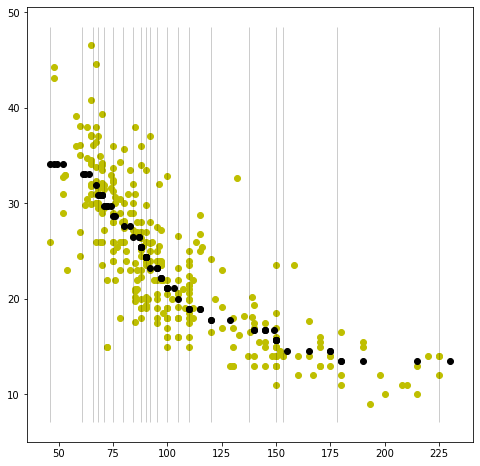

In [ ]:
plt.figure(figsize=(8, 8))

plt.scatter(x_train, y_train, c='y')
plt.scatter(x_test, y_pred, color='k')

plt.vlines(enc.bin_edges_[0], *plt.gca().get_ylim(), linewidth=1, alpha=.2)

plt.show()

#### Discretizing data with encode='onehot' and strategy='quantile' (by default)

In [ ]:
enc = KBinsDiscretizer(n_bins=20, encode='onehot')

x_binned = enc.fit_transform(x_train)

In [ ]:
x_binned.toarray()[:10]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]])

In [ ]:
x_test_binned = enc.transform(x_test)

In [ ]:
reg = LinearRegression().fit(x_binned, y_train)

In [ ]:
y_pred = reg.predict(x_test_binned)

y_pred

array([12.49999997, 34.82000002, 12.49999997, 25.44444442, 23.55367351,
       12.49999997, 16.1571429 , 24.20025961, 19.85384618, 24.98666667,
       19.31428576, 15.03446426, 21.53913043, 14.67196426, 24.98666667,
       23.55367351, 15.03446426, 19.31428576, 23.79444452, 14.67196426,
       15.03446426, 28.39166691, 26.3       , 19.31428576, 28.39166691,
       16.1571429 , 23.55367351, 26.3       , 23.55367351, 25.44444442,
       34.82000002, 31.48446424, 31.48446424, 23.79444452, 21.53913043,
       26.3       , 24.98666667, 23.79444452, 23.55367351, 27.94      ,
       24.20025961, 23.79444452, 18.12499997, 21.53913043, 24.98666667,
       33.19374995, 26.3       , 26.3       , 33.19374995, 15.03446426,
       24.20025961, 12.49999997, 34.82000002, 18.12499997, 31.48446424,
       16.1571429 , 31.48446424, 33.19374995, 33.19374995, 21.53913043,
       24.98666667, 21.53913043, 31.48446424, 19.31428576, 15.03446426,
       27.94      , 25.44444442, 14.67196426, 33.43333325, 23.55

In [ ]:
r2_score(y_test, y_pred)

0.663269379454714

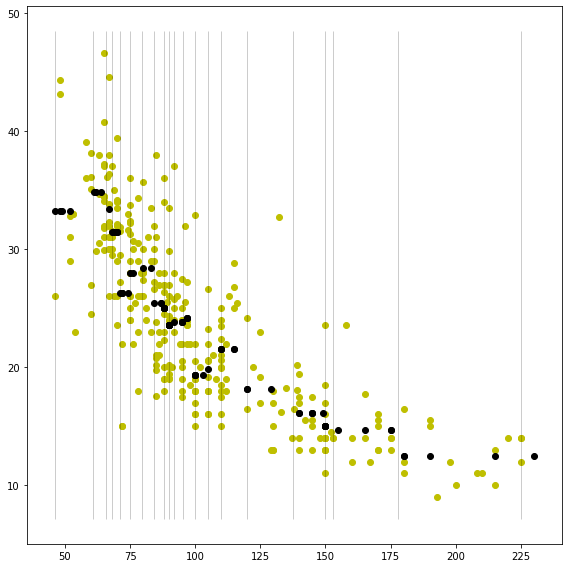

In [ ]:
plt.figure(figsize=(8, 8))

plt.scatter(x_train, y_train, c='y')

plt.scatter(x_test, y_pred, color='k')

plt.vlines(enc.bin_edges_[0], *plt.gca().get_ylim(), linewidth=1, alpha=.2)

plt.tight_layout()